In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
file_path = "C:/Users/Lenovo/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv"
df = pd.read_csv(file_path)

# Convert 'SETTLEMENTDATE' to datetime and set it as index
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])
df.set_index('SETTLEMENTDATE', inplace=True)

# Resample to hourly data to ensure uniform intervals
df_resampled = df['TOTALDEMAND'].resample('H').mean()

<ipython-input-2-9b3e00a66a40>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['TOTALDEMAND'].resample('H').mean()


<ipython-input-3-90953b08af46>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['TOTALDEMAND'].resample('H').mean()


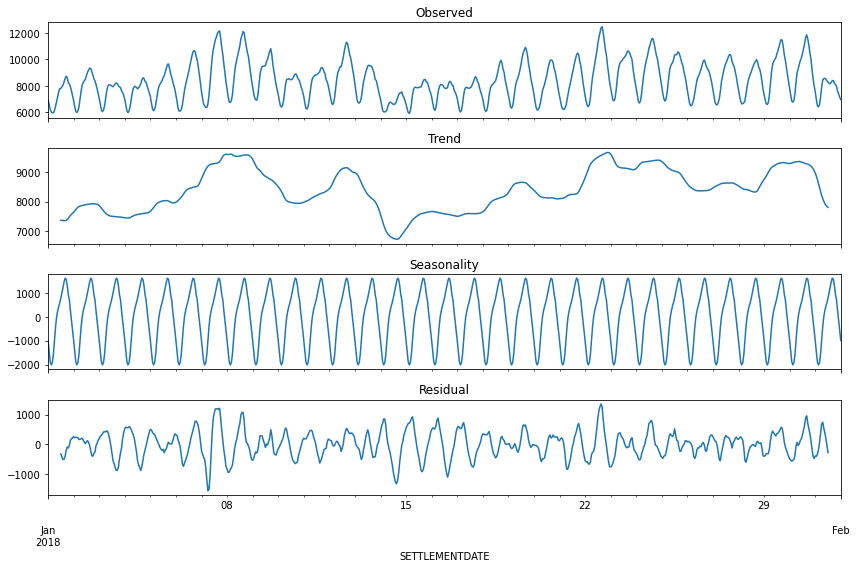

In [3]:
df_resampled = df['TOTALDEMAND'].resample('H').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_resampled.dropna(), model='additive', period=24)  # Assuming daily seasonality

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title="Observed")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
decomposition.resid.plot(ax=axes[3], title="Residual")

plt.tight_layout()
plt.show()